In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import data
df = pd.read_csv("Customers.csv")
print("Data imported")

Data imported


In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = df.iloc[:,[3,4]].values
X.shape

(200, 2)

In [5]:
#creating a dendogram
import scipy.cluster.hierarchy as sch

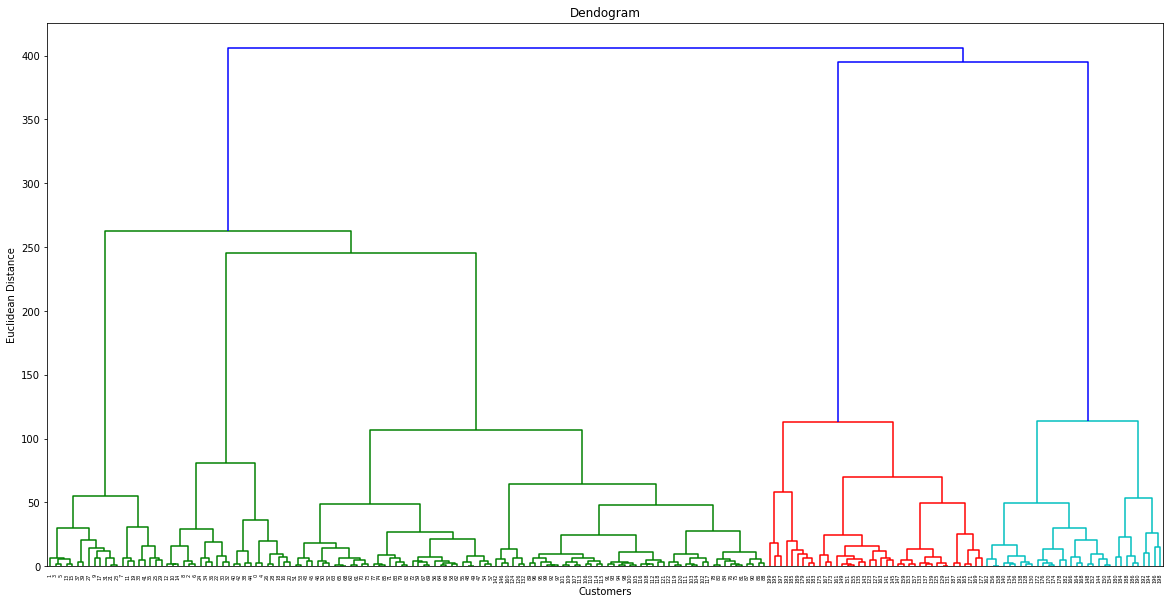

In [7]:
plt.figure(figsize = (20,10))
dendogram = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

It gives **3** clusters

#### Creating clusters using Agglomerative Clustering 

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
help(AgglomerativeClustering())

Help on AgglomerativeClustering in module sklearn.cluster.hierarchical object:

class AgglomerativeClustering(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int, default=2
 |      The number of clusters to find.
 |  
 |  affinity : string or callable, default: "euclidean"
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or 'precomputed'.
 |      If linkage is "ward", only "euclidean" is accepted.
 |  
 |  memory : None, str or object with the joblib.Memory interface, optional
 |      Used to cache the output of the computation of the tree.
 |      By default, no caching is done. If a string is given, it is the
 |      path to the caching directory.
 |  
 |  connectivity

no. of clusters = **5** 
you'll realise with hit-trial

In [17]:
#we'll use n_clusters, affinity & linkage
agc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage= 'ward')
y_pred = agc.fit_predict(X)

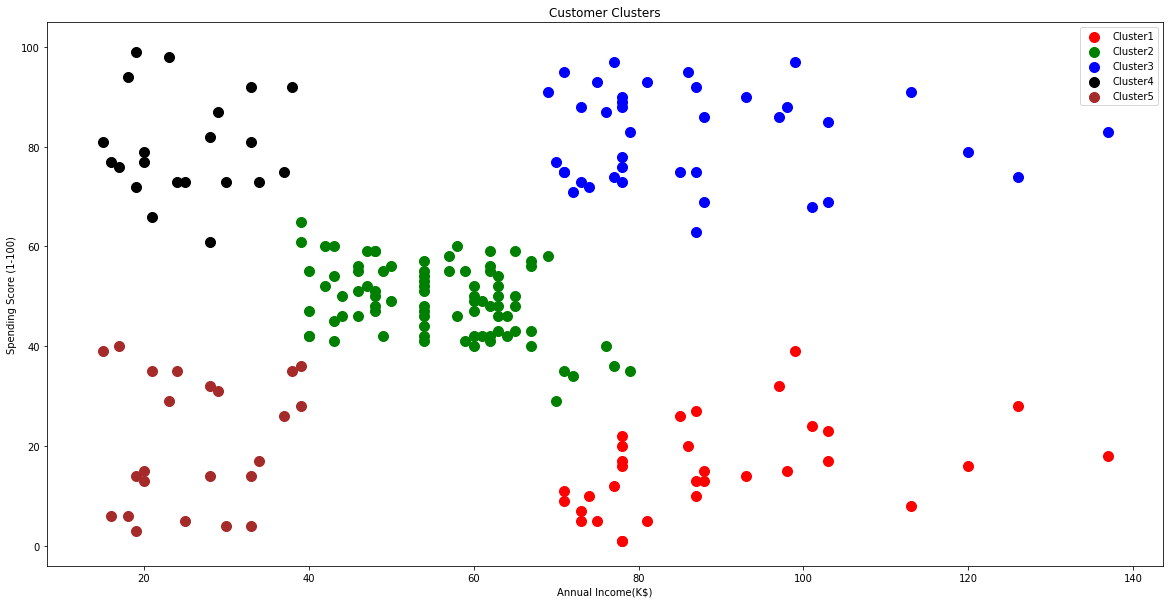

In [19]:
#Visualise clusters
plt.figure(figsize = (20,10))
plt.scatter(X[y_pred==0,0],X[y_pred==0,1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1], s = 100, c = 'green', label = 'Cluster2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1], s = 100, c = 'blue', label = 'Cluster3')
plt.scatter(X[y_pred==3,0],X[y_pred==3,1], s = 100, c = 'black', label = 'Cluster4')
plt.scatter(X[y_pred==4,0],X[y_pred==4,1], s = 100, c = 'brown', label = 'Cluster5')


plt.legend()
plt.xlabel("Annual Income(K$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Clusters")
plt.show()